# Urchin Interactive Graphs Demo
This notebook is a prototype/test for scrubbing through an experiment and visualize it on a 3D model of the brain.

## 1. Importing necessary packages:

Once `urchin.setup()` is ran, a separate browser window will open wtih the 3D model of the brain. Keep it open to the side and watch it populate with the data as future cells run.

In [ ]:
# If running the notebook for the first time (restart the session as requested to properly use):
! pip install ipympl
! pip install oursin

In [ ]:
# Ensure that pop-ups are enabled for Urchin to automatically open in a browser.
# If pop-ups are disabled, you can open the renderer manually at 'https://data.virtualbrainlab.org/Urchin/?ID=[insert id outputted below]'
import oursin as urchin
urchin.setup()
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
import pandas as pd
%matplotlib widget

(URN) connected to server
Login sent with ID: 9b2ac37c, copy this ID into the renderer to connect.


<IPython.core.display.Javascript object>

In [ ]:
# To enable use on colab:
from google.colab import output
output.enable_custom_widget_manager()

## 2. Pulling in necessary data:

In [ ]:
# Downloading data into colab environment:
import gdown
import os

# Create the output directory if it doesn't exist
output_dir = 'data'
os.makedirs(output_dir, exist_ok=True)

# URL of the necessary .npy files:
files = {'1cv0ylzlQHsjPobVMfjDzQsALKBjmhZ7L' : 'spike_times.npy', '17ao2qgmuRMew1CIDBBdfoUY5LojdFCOu' : 'spike_clusters.npy', '1bFN-ZyOulUtbNs7WIq9SqyPbrSBaaijB': 'ims_on_times.npy', '1n4smr91u-n8NXzqt6HO9CN13we_13rhR': 'imIDs.npy', '1b9LDBELDmijduN1pjnfjlylH8cYuFQW2': 'locations.csv'}
for file_id, file_name in files.items():
  url = f'https://drive.google.com/uc?export=download&id={file_id}'

  # Output file path
  output = f'data/{file_name}'

  # Download the file
  gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1cv0ylzlQHsjPobVMfjDzQsALKBjmhZ7L
To: /content/data/spike_times.npy
100%|██████████| 53.1M/53.1M [00:00<00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=17ao2qgmuRMew1CIDBBdfoUY5LojdFCOu
To: /content/data/spike_clusters.npy
100%|██████████| 26.6M/26.6M [00:00<00:00, 161MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1bFN-ZyOulUtbNs7WIq9SqyPbrSBaaijB
To: /content/data/ims_on_times.npy
100%|██████████| 12.1k/12.1k [00:00<00:00, 12.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1n4smr91u-n8NXzqt6HO9CN13we_13rhR
To: /content/data/imIDs.npy
100%|██████████| 12.1k/12.1k [00:00<00:00, 22.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1b9LDBELDmijduN1pjnfjlylH8cYuFQW2
To: /content/data/locations.csv
100%|██████████| 31.7k/31.7k [00:00<00:00, 45.6MB/s]


In [ ]:
# Loading data into proper format:
st_samp = np.load('data/spike_times.npy')
sc = np.load('data/spike_clusters.npy')
event_start = np.load("data/ims_on_times.npy")
event_ids = np.load("data/imIDs.npy")
locations = pd.read_csv("data/locations.csv")

## 3. Plotting interactive graph of each neuron behavior per stimulus: (no renderer component)

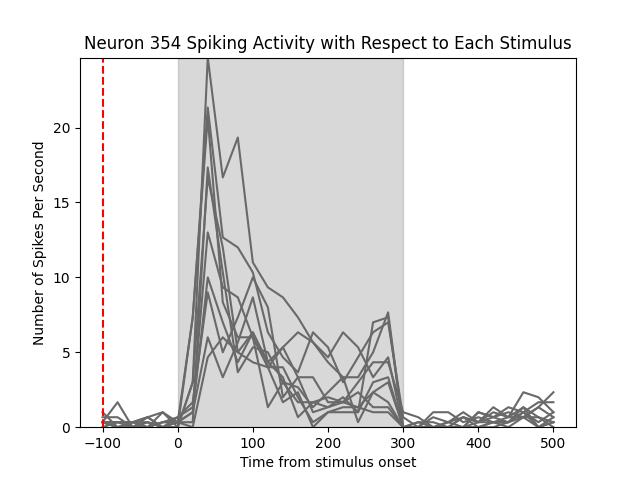

In [ ]:
urchin.ui.plot_event_average_interaction(st_samp, sc, event_start,event_ids, "neuron")

## 4. Loading up Urchin:

In [ ]:
urchin.ccf25.load()

In [ ]:
urchin.ccf25.grey.set_visibility(True)
urchin.ccf25.grey.set_material('transparent-unlit')
urchin.ccf25.grey.set_color([0,0,0])
urchin.ccf25.grey.set_alpha(0.1)
area_list = urchin.ccf25.get_areas(["VISp", "PTLp", "VISam", "VISpm"])
urchin.ccf25.set_visibilities(area_list, True)
urchin.ccf25.set_materials(area_list,'transparent-unlit')
# urchin.ccf25.set_colors(area_list,[[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
urchin.ccf25.set_alphas(area_list,0.2)

In [ ]:
#Setting positions (static):
positions_list = []

for i, row in locations.iterrows():
    position = [round(row.left_right_ccf_coordinate), round(row.anterior_posterior_ccf_coordinate), round(row.dorsal_ventral_ccf_coordinate)]
    positions_list.append(position)

positions_list

[[7620, 7917, 501],
 [7597, 7929, 739],
 [7599, 7928, 718],
 [7603, 7926, 678],
 [7600, 7928, 708],
 [7602, 7927, 688],
 [7602, 7927, 688],
 [7602, 7927, 688],
 [7602, 7927, 688],
 [7602, 7927, 688],
 [7603, 7926, 678],
 [7603, 7926, 678],
 [7609, 7924, 618],
 [7605, 7926, 658],
 [7606, 7925, 648],
 [7606, 7925, 648],
 [7606, 7925, 648],
 [7607, 7925, 638],
 [7609, 7924, 618],
 [7607, 7925, 638],
 [7609, 7924, 618],
 [7610, 7923, 608],
 [7610, 7923, 608],
 [7611, 7923, 599],
 [7611, 7923, 599],
 [7612, 7922, 589],
 [7613, 7921, 569],
 [7610, 7923, 608],
 [7614, 7920, 559],
 [7612, 7922, 589],
 [7618, 7918, 521],
 [7627, 7910, 415],
 [7624, 7913, 453],
 [7624, 7913, 444],
 [7624, 7913, 444],
 [7624, 7913, 444],
 [7624, 7913, 444],
 [7625, 7912, 434],
 [7625, 7912, 434],
 [7624, 7913, 444],
 [7626, 7911, 425],
 [7627, 7910, 415],
 [7627, 7910, 415],
 [7627, 7910, 415],
 [7627, 7910, 406],
 [7627, 7910, 406],
 [7628, 7909, 397],
 [7628, 7909, 397],
 [7629, 7907, 378],
 [7629, 7907, 378],


In [ ]:
urchin.ui.neuron_colors = [urchin.utils.hex_to_rgb(x) for x in urchin.ui.neuron_colors]

## 5. Displaying neurons as located in the dataset:

In [ ]:
urchin.ui.neurons = urchin.meshes.create(len(locations))

In [ ]:
urchin.meshes.set_positions(urchin.ui.neurons, positions_list)
urchin.meshes.set_scales(urchin.ui.neurons, [[0.05,0.05,0.05]]* len(urchin.ui.neurons))
urchin.meshes.set_colors(urchin.ui.neurons, urchin.ui.neuron_colors)

In [ ]:
urchin.meshes.set_scales(urchin.ui.neurons, [[0.05,0.05,0.05]]* len(urchin.ui.neurons))

## 6. Displaying spiking activity of neurons for each stimulus, with Urchin interactive component:

Drag the Time slider and change the Stimulus ID and see the changes reflected on the brain.

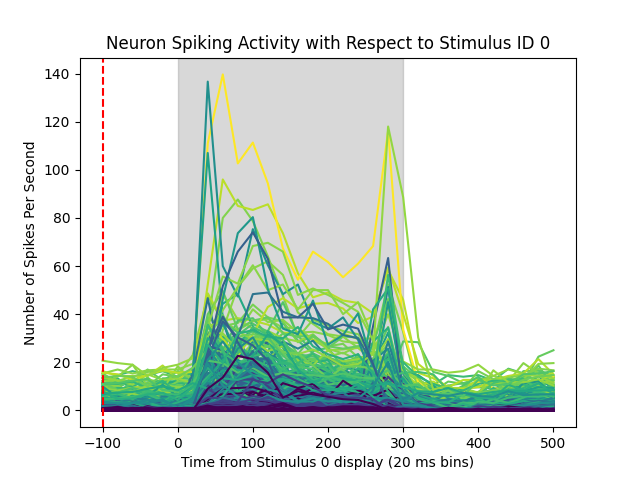

In [ ]:
urchin.ui.plot_event_average_interaction(st_samp, sc, event_start,event_ids, "stim")